<a href="https://colab.research.google.com/github/Kushal-H-Choudhary/python/blob/main/Property_Price_Prediction(House_Price_Estimation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Property Price Prediction(House Price Estimation)**

---



**1. Problem Statement**


---
Property prices are influenced by multiple factors such as house size, location, age, and overall condition. Accurately estimating property prices is important for buyers, sellers, real estate companies, and financial institutions. Manual estimation often leads to incorrect pricing and poor decision-making.

The objective of this project is to build a regression-based machine learning model to predict property prices using historical housing data and to identify the most important factors influencing house prices.



**2. Objectives of the Project**


---


* Understand passenger survival patterns
* Perform basic data preprocessing
* Conduct minimal but meaningful EDA
* Build binary classification models
* Evaluate model performance
* Identify key survival-influencing features

In [ ]:
from google.colab import files
uploded=files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
df=pd.read_csv('train.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int64  
 6   Alley          1460 non-null   int64  
 7   LotShape       1460 non-null   int64  
 8   LandContour    1460 non-null   int64  
 9   Utilities      1460 non-null   int64  
 10  LotConfig      1460 non-null   int64  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int64  
 13  Condition1     1460 non-null   int64  
 14  Condition2     1460 non-null   int64  
 15  BldgType       1460 non-null   int64  
 16  HouseStyle     1460 non-null   int64  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
...,...
YrSold,0
SaleType,0
SaleCondition,0
SalePrice,0


**Numerical Colomns**

---



In [ ]:
#Numerical Colomns
num_cols=df.select_dtypes(include=['int64','float64']).columns
df[num_cols]=df[num_cols].fillna(df[num_cols].median())

**Categorical columns**

---



In [ ]:
#Categorical columns
cat_cols=df.select_dtypes(include=['object']).columns
for col in cat_cols:
  df[col]=df[col].fillna(df[col].mode()[0])

**Explory Data Analysis**

---



**Graph 1 price prediction**

---



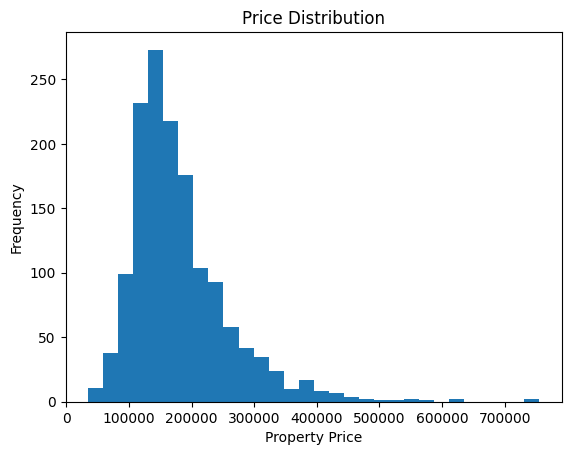

In [ ]:
#Explory Data Analysis
#Graph 1 price prediction
plt.figure()
plt.hist(df['SalePrice'],bins=30)
plt.xlabel("Property Price")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

**Graph 2 House size vs price**

---



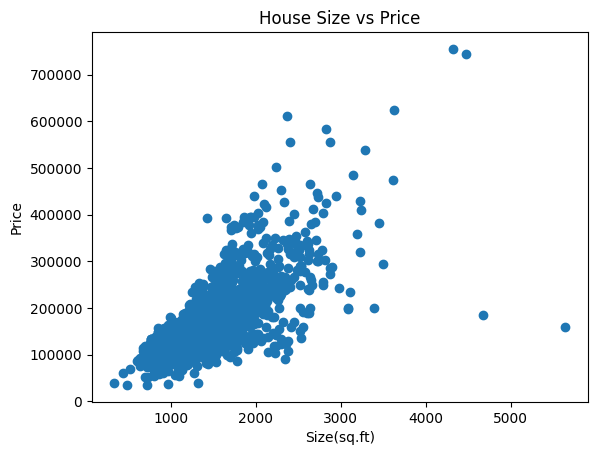

In [ ]:
#Graph 2 House size vs price
plt.figure()
plt.scatter(df['GrLivArea'],df['SalePrice'])
plt.xlabel("Size(sq.ft)")
plt.ylabel("Price")
plt.title("House Size vs Price")
plt.show()

**Price by location**

---



<Figure size 640x480 with 0 Axes>

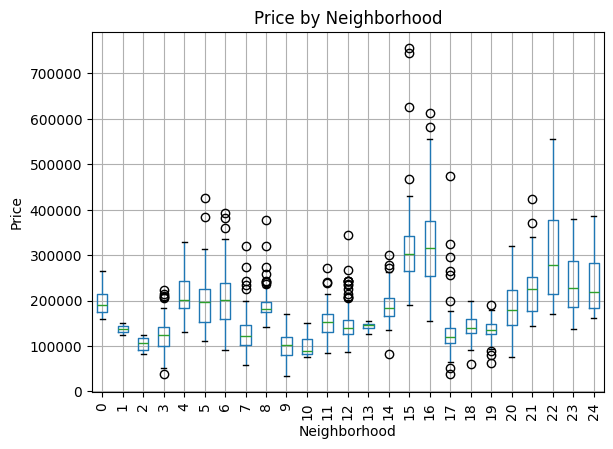

In [ ]:
#Price by location
plt.figure()
df.boxplot(column='SalePrice',by='Neighborhood')
plt.xlabel("Neighborhood")
plt.ylabel("Price")
plt.title("Price by Neighborhood")
plt.suptitle("")
plt.xticks(rotation=90)
plt.show()

**Graph 4 Property Age vs price**

---



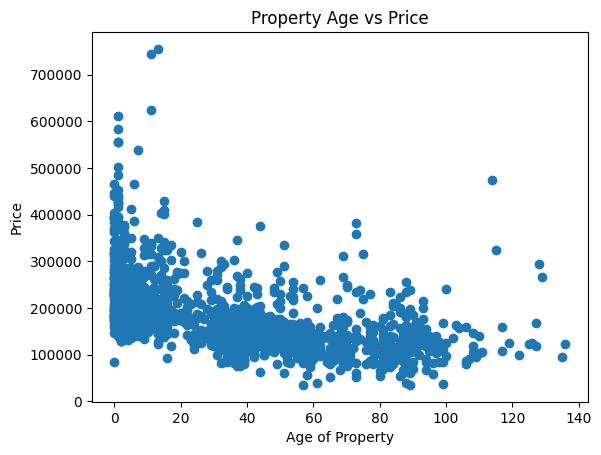

In [ ]:
#Graph 4 Property Age vs price
df['Age']=df['YrSold']-df['YearBuilt']
plt.figure()
plt.scatter(df['Age'],df['SalePrice'])
plt.xlabel("Age of Property")
plt.ylabel("Price")
plt.title("Property Age vs Price")
plt.show()

**Encode Categorical Variables**

---



In [ ]:
#Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

**Feature selection**

---



In [ ]:
#Feature selection
X=df.drop(['Id','SalePrice'],axis=1)
y=df['SalePrice']

**Train test split**

---



In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Linear Regression model**

---



In [ ]:
#Linear Regression model
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_lr=lr.predict(X_test)

In [ ]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

In [ ]:
print("Linear Regression RMSE:",rmse_lr)
print("Linear Regression R2 Score:",r2_lr)

Linear Regression RMSE: 35312.138344719235
Linear Regression R2 Score: 0.8374323228511199


**Decision tree regressor**

---



In [ ]:
#decision tree regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

In [ ]:
print("Decision Tree RMSE:", rmse_dt)
print("Decision Tree R2 Score:", r2_dt)

Decision Tree RMSE: 43833.769223265444
Decision Tree R2 Score: 0.7495022672545355


**Random Forest Regressor**

---



In [ ]:
#Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
rmse_rf=np.sqrt(mean_squared_error(y_test,y_pred_rf))
r2_rf=r2_score(y_test,y_pred_rf)

In [ ]:
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2 Score:", r2_rf)

Random Forest RMSE: 28316.757688529135
Random Forest R2 Score: 0.8954622340260382


**Graph 5 Actual vs Predicted**

---



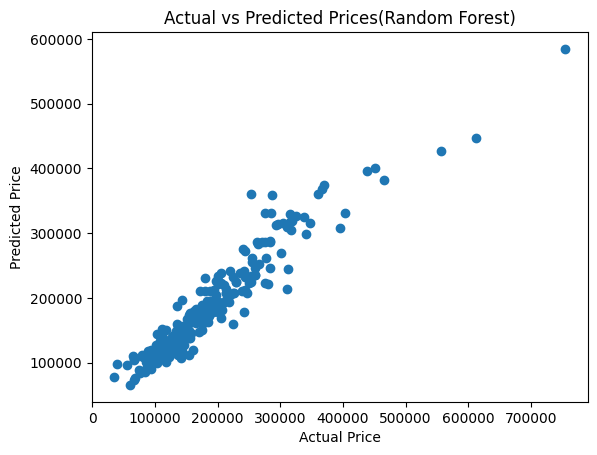

In [ ]:
#Graph 5 Actual vs Predicted
plt.figure()
plt.scatter(y_test,y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices(Random Forest)")
plt.show()

**Graph 6 Feature Importances**

---



In [ ]:
#Graph 6 Feature Importances
importances = rf.feature_importances_
features = X.columns

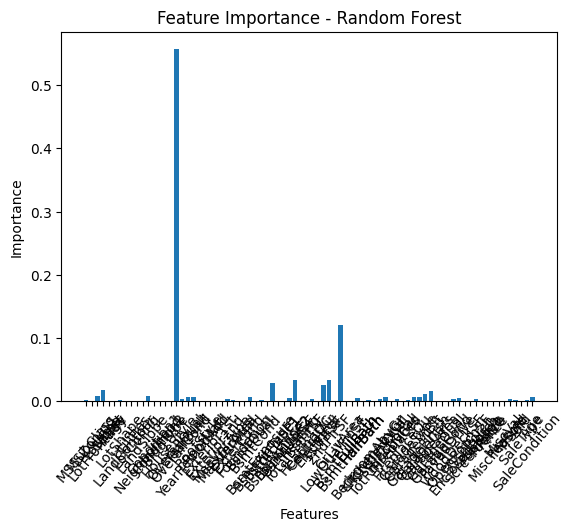

In [ ]:
plt.figure()
plt.bar(features,importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.xticks(rotation=50)
plt.show()

**Final model Comparison**

---



In [ ]:
#Final model Comparison
print("MODEL COMPARISON")
print("________________")
print("Linear Regression -> RMSE:", rmse_lr, " R2:", r2_lr)
print("Decision Tree     -> RMSE:", rmse_dt, " R2:", r2_dt)
print("Random Forest     -> RMSE:", rmse_rf, " R2:", r2_rf)

MODEL COMPARISON
________________
Linear Regression -> RMSE: 35312.138344719235  R2: 0.8374323228511199
Decision Tree     -> RMSE: 43833.769223265444  R2: 0.7495022672545355
Random Forest     -> RMSE: 28316.757688529135  R2: 0.8954622340260382
